# 1. Business Requirements

- Mục tiêu: Dự đoán khách hàng có rời bỏ dịch vụ (Churn) hay không
- Ý nghĩa: Giúp doanh nghiệp giữ chân được khách hàng, cải thiện chiến lược kinh doanh, ...
- Dữ liệu: https://www.kaggle.com/datasets/blastchar/telco-customer-churn (Kaggle)
- Target variable: Churn (0: No, 1: Yes)

---

---

# 2. Data Understanding

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df = pd.read_csv('data/Telecom_Customer_Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [19]:
df.shape    # Kích thước của dữ liệu

(7043, 21)

In [25]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [21]:
df.describe()   # Thống kê các thuộc tính dạng numeric

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [22]:
# Kiểm tra dữ liệu có chứa missing data và dupliceted
na = df.isna().any()
dup = df.duplicated().any()
print(f"Missing values:\n{na}")
print(f"\nContains duplicates: {dup}")

Missing values:
customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

Contains duplicates: False


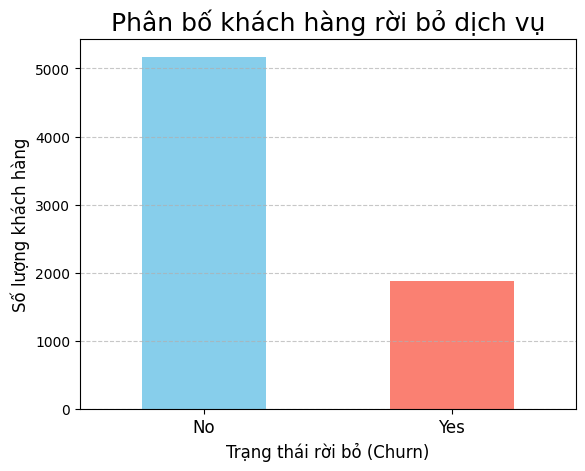

In [23]:
# Tạo df thể hiện số lượng trạng thái khách hàng
df_churn_count = df['Churn'].value_counts()

df_churn_count.plot(kind='bar', color=['skyblue', 'salmon'])

# Tiêu đề và nhãn
plt.title('Phân bố khách hàng rời bỏ dịch vụ', fontsize=18)
plt.xlabel('Trạng thái rời bỏ (Churn)', fontsize=12)
plt.ylabel('Số lượng khách hàng', fontsize=12)
plt.xticks(rotation=0, fontsize=12)

# Đường kẻ
plt.grid(axis='y', linestyle='--', alpha=0.7)

In [24]:
s

NameError: name 's' is not defined

---

### Columns Information

* `tenure`: Số tháng sử dụng dịch vụ.
* `PhoneService`: Có dịch vụ điện thoại (`Yes`/`No`).
* `MultipleLines`: Có nhiều đường dây điện thoại (`Yes`/`No`).
* `InternetService`: Loại Internet (`DSL`, `Fiber optic`, `No`).
* `OnlineSecurity`: Dịch vụ bảo mật trực tuyến (`Yes`/`No`).
* `OnlineBackup`: Dịch vụ sao lưu trực tuyến (`Yes`/`No`).
* `DeviceProtection`: Bảo vệ thiết bị (`Yes`/`No`).
* `TechSupport`: Hỗ trợ kỹ thuật (`Yes`/`No`).
* `StreamingTV`: Xem TV trực tuyến (`Yes`/`No`).
* `StreamingMovies`: Xem phim trực tuyến (`Yes`/`No`).
* `Contract`: Loại hợp đồng (`Month-to-month`, `One year`, `Two year`).
* `PaperlessBilling`: Hóa đơn điện tử (`Yes`/`No`).
* `PaymentMethod`: Phương thức thanh toán.
* `MonthlyCharges`: Phí hàng tháng.
* `TotalCharges`: Tổng chi tiêu.
* `Churn` (Label): Rời bỏ dịch vụ (`Yes`/`No`).

---

---

# 3. Data Preprocessing

In [ ]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


#### 3.1.Clean data

In [ ]:
# Transform datatype
# Biến đổi dành cho kiểu dữ liệu nhị phân
bin_mapping = {
    'Yes':1,
    'No':0
}

binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling','Churn']

# Apply vào df
df[binary_cols] = df[binary_cols].apply(lambda x:x.map(bin_mapping))

In [ ]:
null_TotalCharges = df[df['TotalCharges'] == ' ']
df.drop(null_TotalCharges.index, axis=0, inplace=True)  # Xoá các sample chứa giá trị là: ' ' ở cột `TotalCharges`
df['TotalCharges'].astype(float)

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7032, dtype: float64

#### 3.2. Chia nhóm cột

In [ ]:
num_feat = ['tenure', 'MonthlyCharges', 'TotalCharges'] # Dữ liệu dạng số
cat_ordinal_feat = ['Contract'] # Sẽ mã hoá theo dạng Ordinal (Thứ tự có logic)
cat_onehot_feat = ['InternetService', 'PaymentMethod']  # Mã hoá theo dạng (0,1)

#### 3.3. Chia thành các tập train/test

In [ ]:
from sklearn.model_selection import train_test_split

X = df[num_feat + cat_ordinal_feat + cat_onehot_feat]    # Feature
y = df['Churn'] # Label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### 3.4. Encode và Scale dữ liệu

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_feat),
    ('ord', OrdinalEncoder(categories=[['Month-to-month', 'One year', 'Two year']]), cat_ordinal_feat),
    ('cat', OneHotEncoder(), cat_onehot_feat)
])

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

---

---

# 4. Modeling

#### 4.1. Init Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Vì dữ liệu imbalanced ở label nên thêm vào tham số class_weight='balanced'
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced'),
    "Random Forest": RandomForestClassifier(class_weight='balanced'),
    "SVM": SVC(class_weight='balanced')
}

#### 4.2. Traing và predict

In [ ]:
for name, model in models.items():
    model.fit(X_train_processed, y_train)
    print(f'Trained model: {name}')

Trained model: Logistic Regression
Trained model: Random Forest
Trained model: SVM


---

---

# 5. Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

results = []
lst_y_pred = []
for name, model in models.items():
    y_pred = model.predict(X_test_processed)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    lst_y_pred.append(y_pred)
    results.append([name, acc, prec, rec, f1])

# dataframe kết quả
df_results = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1'])
print(df_results.sort_values(by='F1', ascending=False))


                 Model  Accuracy  Precision    Recall        F1
0  Logistic Regression  0.726368   0.491086  0.810160  0.611504
2                  SVM  0.732765   0.498305  0.786096  0.609959
1        Random Forest  0.754797   0.544892  0.470588  0.505022


###  Ma trận nhầm lẫn

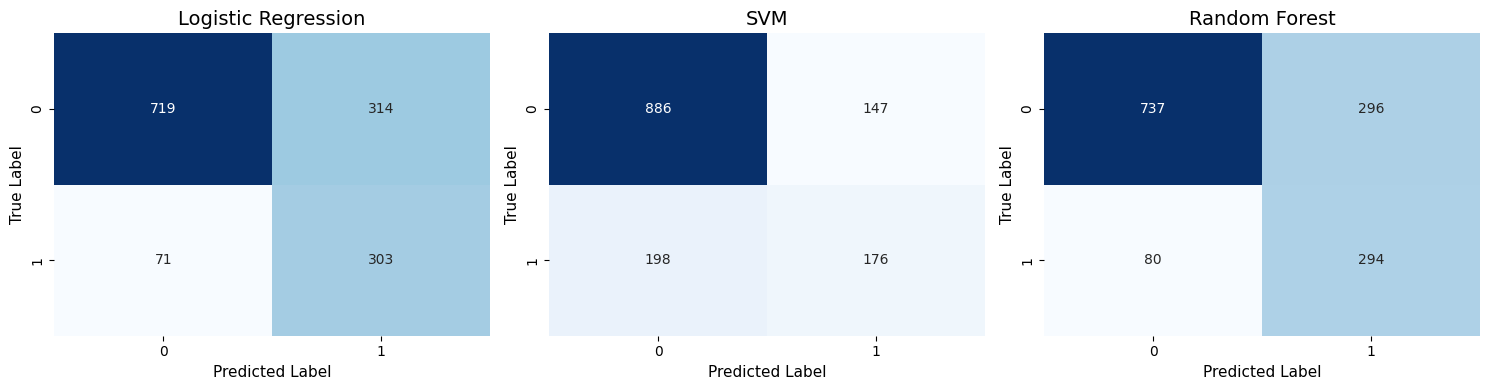

In [ ]:
from sklearn.metrics import confusion_matrix

model_names = ['Logistic Regression', 'SVM', 'Random Forest']

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for i, ax in enumerate(axes):
    cm = confusion_matrix(y_test, lst_y_pred[i])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)

    ax.set_title(f'{model_names[i]}', fontsize=14)
    ax.set_xlabel('Predicted Label', fontsize=11)
    ax.set_ylabel('True Label', fontsize=11)

plt.tight_layout()

In [ ]:
X

,tenure,MonthlyCharges,TotalCharges,Contract,InternetService,PaymentMethod
0,1,29.85,29.85,Month-to-month,DSL,Electronic check
1,34,56.95,1889.5,One year,DSL,Mailed check
2,2,53.85,108.15,Month-to-month,DSL,Mailed check
3,45,42.30,1840.75,One year,DSL,Bank transfer (automatic)
4,2,70.70,151.65,Month-to-month,Fiber optic,Electronic check
...,...,...,...,...,...,...
7038,24,84.80,1990.5,One year,DSL,Mailed check
7039,72,103.20,7362.9,One year,Fiber optic,Credit card (automatic)
7040,11,29.60,346.45,Month-to-month,DSL,Electronic check
7041,4,74.40,306.6,Month-to-month,Fiber optic,Mailed check


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('model', RandomForestClassifier())
])


metrics = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

results = cross_validate(
    pipeline, X, y,
    cv=5,
    scoring=metrics,
    return_train_score=True
)

print("Mean accuracy:", results['test_accuracy'].mean())
print("Mean precision:", results['test_precision_macro'].mean())
print("Mean recall:", results['test_recall_macro'].mean())
print("Mean F1:", results['test_f1_macro'].mean())

Mean accuracy: 0.7711869427501792
Mean precision: 0.7043511537312221
Mean recall: 0.681350810291588
Mean F1: 0.6902526498719761
